In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.decomposition import PCA

In [2]:
train = np.load('data/train.npy', allow_pickle = 'True')
test = np.load('data/test.npy', allow_pickle = 'True')

In [14]:
train_image = train[:,2:]#.reshape(-1,28,28).astype(np.int)
train_digit = train[:,0]
train_letter = train[:,1]
train_del_noise = np.where(train_image>=150, train_image, 0)

test_image = test[:,1:].reshape(-1,28,28).astype(np.int)

In [15]:
print(train_image.shape)
print(train_del_noise.shape)

(2048, 784)
(2048, 784)


In [40]:
def class_pca(data, num, n):
    lst = []
    for idx in range(len(data)):
        if train_digit[idx] == num:
            lst.append(data[idx])
    lst = np.array(lst)
    
    pca = PCA(n_components=n)
    x = lst.reshape(lst.shape[0],-1).copy()
    w = pca.fit_transform(x)
    return pca.components_, pca.explained_variance_ratio_

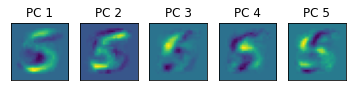

In [41]:
# image 5
num_5, e = class_pca(train_del_noise, 5, 5)

fig, axes = plt.subplots(1, 5,
                         subplot_kw={'xticks':(),'yticks':()})
for i, (comp, ax) in enumerate(zip(num_5, axes.ravel())):
    ax.imshow(comp.reshape(28,28))
    ax.set_title('PC {}'.format(i+1))
plt.show()

In [42]:
e

array([0.07175223, 0.06184575, 0.05023197, 0.04708061, 0.04282894])

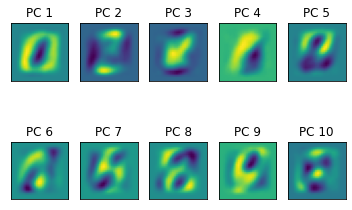

In [32]:
# total PCA
pca = PCA(n_components=10, whiten=True)
x = train_image.copy()
w = pca.fit_transform(x)

fig, axes = plt.subplots(2, 5,
                         subplot_kw={'xticks':(),'yticks':()})
for i, (comp, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(comp.reshape(28,28))
    ax.set_title('PC {}'.format(i+1))
plt.show()

In [29]:
pca = PCA(n_components=10)
x = train_del_noise.copy()
w = pca.fit_transform(x)

pca.components_

array([[ 2.11424440e-18, -1.12018879e-19,  2.70416674e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.78400974e-17, -4.44259928e-19,  8.24865450e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 3.21159325e-17,  7.55074671e-18, -3.90453367e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 9.62790852e-17, -3.00044475e-17, -3.66083113e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 4.94428707e-17,  1.47744057e-17,  1.83720228e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.51934747e-17,  6.72545735e-17,  2.39595999e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [36]:
pca_n.components_

array([[ 2.54781708e-18, -7.67209330e-19, -8.22358101e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.41148873e-17, -8.62763837e-18, -1.48080238e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.21429337e-17,  2.13762318e-17,  1.38644667e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [-5.00835763e-17,  1.59943715e-17, -1.91952082e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.33252535e-17, -2.74359489e-17, -3.16811641e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-6.34167399e-17, -1.35942722e-17, -1.39376289e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

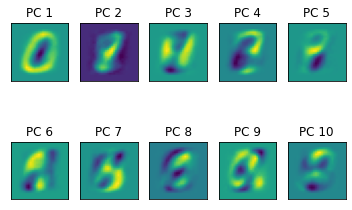

In [50]:
# total del_noise PCA
pca_n = PCA(n_components=10, whiten=True)
x = train_del_noise.copy()
w = pca_n.fit_transform(x)

fig, axes = plt.subplots(2, 5,
                         subplot_kw={'xticks':(),'yticks':()})
for i, (comp, ax) in enumerate(zip(pca_n.components_, axes.ravel())):
    ax.imshow(comp.reshape(28,28))
    ax.set_title('PC {}'.format(i+1))
plt.show()

In [38]:
pca.explained_variance_ratio_

array([0.06506175, 0.05400339, 0.04586244, 0.04458016, 0.038047  ,
       0.0347889 , 0.03295429, 0.03024393, 0.02580929, 0.02542478])

In [39]:
pca_n.explained_variance_ratio_

array([0.06506175, 0.05400339, 0.04586244, 0.04458016, 0.038047  ,
       0.03478892, 0.03295429, 0.03024401, 0.0258092 , 0.02542471])

In [44]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95) + 1
print("선택할 차원 수 :",d)

# n_components에 원하는 variance_ratio를 넣으면 알아서 계산해준다.

선택할 차원 수 : 1


(-0.5, 27.5, 27.5, -0.5)

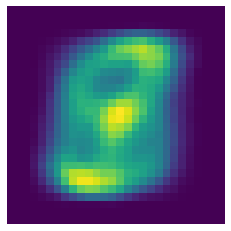

In [54]:
plt.imshow(pca.mean_.reshape(28,28))
plt.axis('off')